In [34]:
import pandas as pd
from collections import Counter
import numpy as np
from matplotlib.table import table
from sklearn.neighbors import KernelDensity
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid_spec
import jinja2
import re
import tabulate
import ridgeplot as rg
import nbformat
from sympy import true

import seaborn as sns
import plotly.io as pio
pio.renderers.default = "notebook"

In [2]:
#Justin Li - Feb. 19 2026
# This is an exploratory EDA of the following variables: "CaseYear", "CrashDate","CrashSeverity", "MaxInjurySeverity","NumberOfFatalities","NumberOfInjuries","NumberOfOtherInjuries","NumberOfVehicles", "CommercialVehicleCrashInd", "isLargeTruckCrash", and if I can get to it
df = pd.read_csv("2012-24_Crash_Events.csv")
df.columns


/tmp/ipykernel_21113/1922831206.py:3: DtypeWarning: Columns (0: CaseNumber) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("2012-24_Crash_Events.csv")


Index(['CaseNumber', 'CaseYear', 'CrashDate', 'CrashTime',
       'CrashTimeFormatted', 'CrashTypeCde', 'CrashType', 'CollisionType',
       'CrashSeverity', 'LightCondition', 'WeatherCondition',
       'RoadwayAccessControlCde', 'RoadwayCharacteristic',
       'RoadSurfaceCondition', 'TrafficControl', 'TrafficWay',
       'MaxInjurySeverity', 'NumberOfFatalities', 'NumberOfInjuries',
       'NumberOfSeriousInjuries', 'NumberOfOtherInjuries', 'NumberOfVehicles',
       'PoliceDept', 'ReportingAgency', 'Precinct',
       'CommercialVehicleCrashInd', 'PPDRCode', 'NonReportable',
       'ReviewedIndicator', 'DMVInsertDate', 'CountyFIPS', 'CountyName',
       'MuniFIPS', 'CityTownName', 'OnStreet', 'ClosestCrossStreet',
       'MasterIntersectionId', 'IntersectionIndicator', 'ReferenceMarker',
       'DistanceFromIntersection', 'DirectionFromIntersection', 'UTMEasting',
       'UTMNorthing', 'NonPublicWayCode', 'ACCESS_CONTROL', 'DIVIDED',
       'FUNCTIONAL_CLASS', 'MAINT_JURISDICTION_TYP

In [3]:
summary_table = df[["CaseYear", "CrashDate","CrashSeverity", "MaxInjurySeverity","NumberOfFatalities","NumberOfInjuries","NumberOfSeriousInjuries","NumberOfOtherInjuries","NumberOfVehicles", "CommercialVehicleCrashInd", "isLargeTruckCrash"]]
summary_table.head()

#load data


,CaseYear,CrashDate,CrashSeverity,MaxInjurySeverity,NumberOfFatalities,NumberOfInjuries,NumberOfSeriousInjuries,NumberOfOtherInjuries,NumberOfVehicles,CommercialVehicleCrashInd,isLargeTruckCrash
0,2021,2021-01-05,PROPERTY DAMAGE,NaN,0,0,0,0,2,0,0
1,2021,2021-01-09,INJURY,C - POSSIBLE INJURY,0,1,0,1,2,0,1
2,2021,2021-01-09,PROPERTY DAMAGE,NaN,0,0,0,0,2,0,0
3,2021,2021-01-05,PROPERTY DAMAGE,NaN,0,0,0,0,2,0,0
4,2021,2021-01-05,PROPERTY DAMAGE,NaN,0,0,0,0,2,1,1


In [4]:

summary_stat = summary_table[["CaseYear", "CrashSeverity", "MaxInjurySeverity","NumberOfFatalities","NumberOfInjuries","NumberOfSeriousInjuries","NumberOfOtherInjuries","NumberOfVehicles", "CommercialVehicleCrashInd", "isLargeTruckCrash"]].describe()

print(summary_table['MaxInjurySeverity'].unique())
print(summary_table['CrashSeverity'].unique())
summary_stat
#initial summary statistics where applicable
#note: i think we should do some feature engineering on the crashseverity and maxinjuryseverity variables. like, turn those letters into numbers, maybe.
#% of cases which involve commercial vehicles, bar graph of the most severe type of crash and injury severity

<StringArray>
[                  nan, 'C - POSSIBLE INJURY',          'B - INJURY',
  'A - SERIOUS INJURY',           'K - FATAL',         'U - UNKNOWN']
Length: 6, dtype: str
<StringArray>
['PROPERTY DAMAGE', 'INJURY', 'FATAL', nan]
Length: 4, dtype: str


,CaseYear,NumberOfFatalities,NumberOfInjuries,NumberOfSeriousInjuries,NumberOfOtherInjuries,NumberOfVehicles,CommercialVehicleCrashInd,isLargeTruckCrash
count,291634.000000,291634.000000,291634.000000,291634.000000,291634.000000,291634.000000,291634.000000,291634.000000
mean,2017.699140,0.002006,0.230957,0.021325,0.208408,1.839268,0.010256,0.035260
std,3.680505,0.046693,0.579632,0.164508,0.543614,0.545699,0.100751,0.184436
min,2012.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,2018.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
75%,2021.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
max,2024.000000,3.000000,30.000000,13.000000,17.000000,11.000000,1.000000,1.000000


In [5]:
summary_table_sorted_year = summary_table.sort_values('CrashDate')
summary_table_sorted_year.head()
# sort by year


,CaseYear,CrashDate,CrashSeverity,MaxInjurySeverity,NumberOfFatalities,NumberOfInjuries,NumberOfSeriousInjuries,NumberOfOtherInjuries,NumberOfVehicles,CommercialVehicleCrashInd,isLargeTruckCrash
60142,2012,2012-01-01,PROPERTY DAMAGE,NaN,0,0,0,0,1,0,0
59737,2012,2012-01-01,PROPERTY DAMAGE,NaN,0,0,0,0,1,0,0
60068,2012,2012-01-01,INJURY,C - POSSIBLE INJURY,0,1,0,1,2,0,0
59176,2012,2012-01-01,PROPERTY DAMAGE,NaN,0,0,0,0,2,0,0
58942,2012,2012-01-01,INJURY,C - POSSIBLE INJURY,0,1,0,1,2,0,0


In [6]:
# function to quickly make summary stats of each year for non-categorical values

def yearlist (startyear,endyear):
    years=[]
    for year in range(startyear,endyear+1):
        years.append(year)
    return years
def yearstats (frame, column, years):
    yearsums = []
    yearmeans = []
    yearprops = []
    casecounts = []

    for year in years:
        frameyear = frame[frame['CaseYear'] == year]
        casecount = frameyear.shape[0]
        casecounts.append(casecount)
        yearsums.append(frameyear[column].sum())
        yearmeans.append(frameyear[column].mean())
        frameyear = frameyear[frameyear[column] > 0]
        yearprops.append(frameyear.shape[0]/casecount)
    return yearsums, yearmeans, yearprops, casecounts

def yearagg (frame, column, year):
    return frame[frame["CaseYear"] == year][column].values



[2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024]


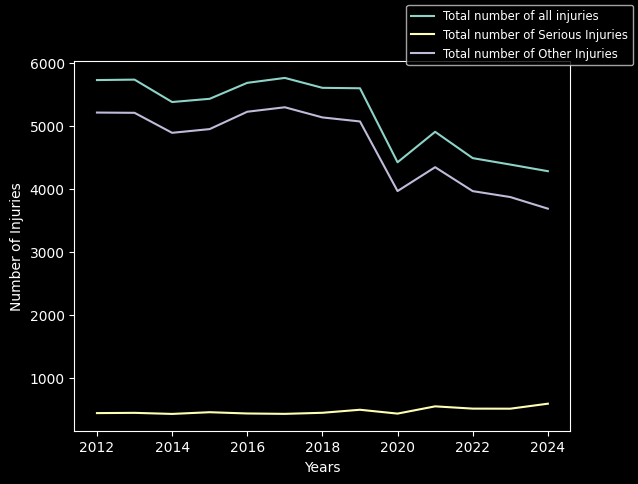

In [30]:
# a plot of serious injuries in a year vs. injuries, etc.
years = summary_table_sorted_year['CaseYear'].unique()
years.sort()
print(years)
Injuries_yearsum, Injuries_yearmeans, Injuries_yearprops,Injuries_casecount = yearstats(summary_table_sorted_year,"NumberOfInjuries",years)
SeriousInjuries_yearsum, SeriousInjuries_yearmeans, SeriousInjuries_yearprops,SeriousInjuries_casecount = yearstats(summary_table_sorted_year,"NumberOfSeriousInjuries",years)
OtherInjuries_yearsum, OtherInjuries_yearmeans, OtherInjuries_yearprops,OtherInjuries_casecount = yearstats(summary_table_sorted_year,"NumberOfOtherInjuries",years)


plt.plot(years, Injuries_yearsum, label="Total number of all injuries")
plt.plot(years, SeriousInjuries_yearsum, label="Total number of Serious Injuries")
plt.plot(years, OtherInjuries_yearsum, label="Total number of Other Injuries")
plt.figlegend(fontsize='small')
plt.xlabel("Years")
plt.ylabel("Number of Injuries")
plt.show()

In [12]:
#ridgeplot of injuries

yearagg_injuries = []

for year in years:
    yearagg_injuries.append(yearagg(summary_table_sorted_year,"NumberOfInjuries",year))

ridge_injuries = rg.ridgeplot (samples = yearagg_injuries)
ridge_injuries.show()
# Most crashes don't result in many injures, but a few outliers...

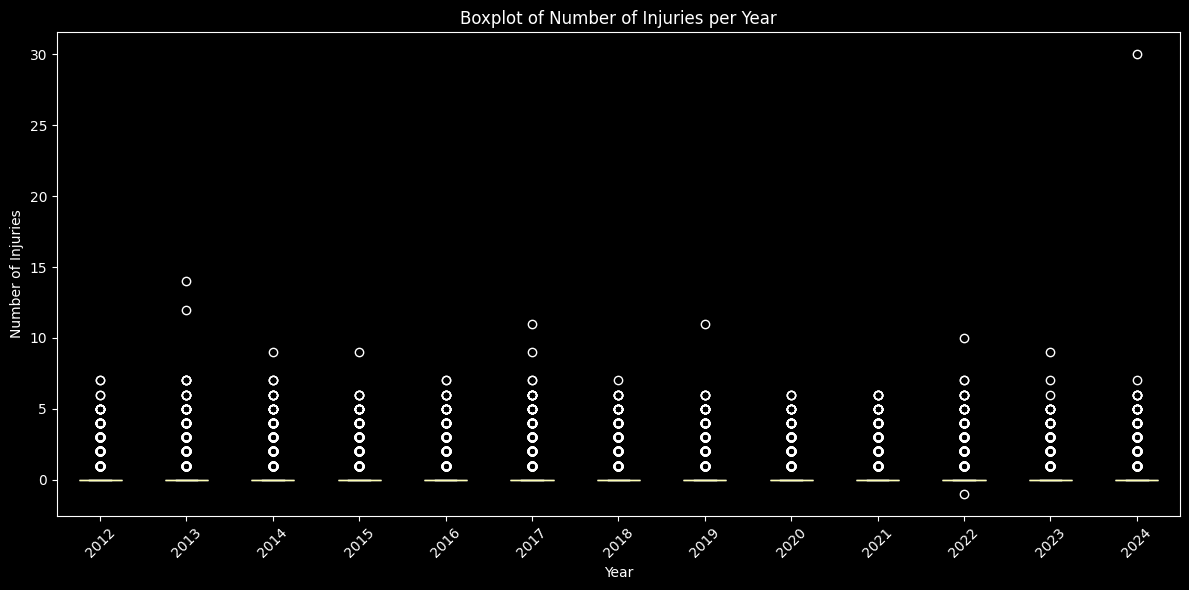

In [32]:
# Prepare the data
yearagg_injuries = []
for year in years:
    yearagg_injuries.append(yearagg(summary_table_sorted_year, "NumberOfInjuries", year))

# Create the boxplot and capture the returned dict
plt.figure(figsize=(12, 6))
box = plt.boxplot(
    yearagg_injuries,
    tick_labels=years,  # updated from 'labels'
    showfliers=True,
    patch_artist=True
)

# Color each box
colors = plt.cm.viridis_r(np.linspace(0, 1, len(years)))
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Title and labels
plt.title("Boxplot of Number of Injuries per Year")
plt.xlabel("Year")
plt.ylabel("Number of Injuries")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

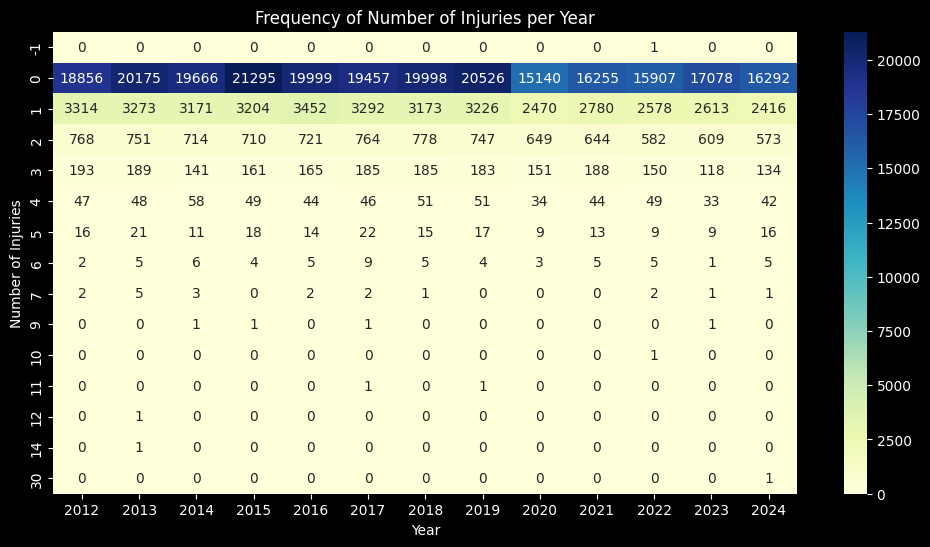

In [39]:
freq_data = {}
for year, year_data in zip(years, yearagg_injuries):
    counts = pd.Series(year_data).value_counts().sort_index()
    freq_data[year] = counts

freq_table = pd.DataFrame(freq_data).fillna(0).astype(int)

plt.figure(figsize=(12, 6))
sns.heatmap(freq_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Frequency of Number of Injuries per Year")
plt.xlabel("Year")
plt.ylabel("Number of Injuries")
plt.show()

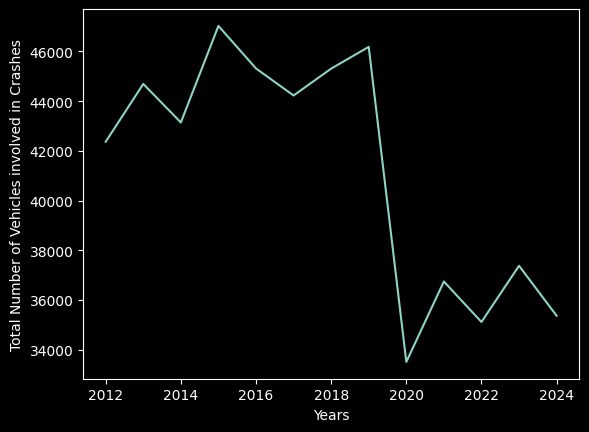

In [11]:
#a plot of the total # of cars involved in a crash over the years
TotalVics_yearsum, TotalVics_yearmeans, TotalVics_yearprops,TotalVics_casecount = yearstats(summary_table_sorted_year,"NumberOfVehicles",years)

plt.plot(years, TotalVics_yearsum)
plt.xlabel("Years")
plt.ylabel("Total Number of Vehicles involved in Crashes")
plt.show()


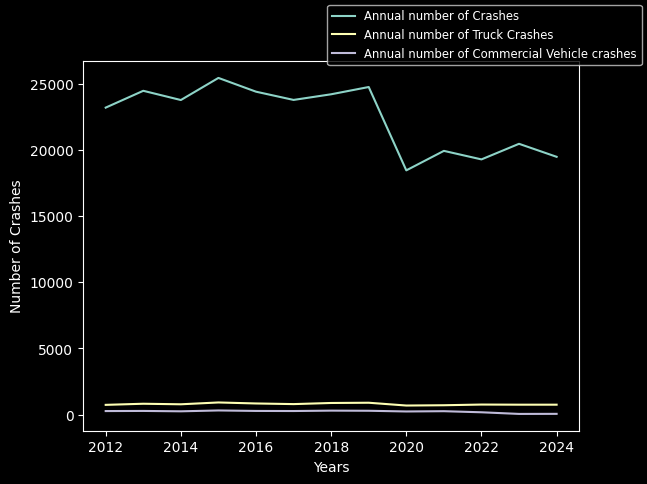

In [17]:
#total number of crashes per year vs. the crashes that involve trucks or commercial vehicles
total, total, total,casecounts = yearstats(summary_table_sorted_year,"CaseYear",years)
Truck_yearsum, Truck_yearmeans, Truck_yearprops,Truck_yearcounts = yearstats(summary_table_sorted_year,"isLargeTruckCrash",years)
Comm_yearsum, Truck_yearmeans, Truck_yearprops,Truck_yearcounts = yearstats(summary_table_sorted_year,"CommercialVehicleCrashInd",years)

plt.plot(years, casecounts, label = "Annual number of Crashes")
plt.plot(years, Truck_yearsum, label = "Annual number of Truck Crashes")
plt.plot(years, Comm_yearsum, label= "Annual number of Commercial Vehicle crashes")

plt.figlegend(fontsize='small')
plt.xlabel("Years")
plt.ylabel("Number of Crashes")
plt.show()



<StringArray>
[               'None', 'C - POSSIBLE INJURY',          'B - INJURY',
  'A - SERIOUS INJURY',           'K - FATAL',         'U - UNKNOWN']
Length: 6, dtype: str
<StringArray>
['PROPERTY DAMAGE', 'INJURY', 'None', 'FATAL']
Length: 4, dtype: str
dict_items([('None', [np.int64(18900), np.int64(20204), np.int64(19678), np.int64(21286), np.int64(19975), np.int64(19435), np.int64(19966), np.int64(20500), np.int64(15097), np.int64(16115), np.int64(7456), np.int64(0), np.int64(0)]), ('Unknown', [np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(4), np.int64(6), np.int64(15), np.int64(22), np.int64(28), np.int64(112), np.int64(8423), np.int64(17040), np.int64(16262)]), ('Possible Injury', [np.int64(3203), np.int64(3170), np.int64(3064), np.int64(3095), np.int64(3246), np.int64(3216), np.int64(3131), np.int64(3151), np.int64(2336), np.int64(2548), np.int64(1081), np.int64(0), np.int64(0)]), ('Injury', [np.int64(664), np.int64(662), np.int64(601), np.int64(633), np.int64

/tmp/ipykernel_21113/3985266746.py:54: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



(0.0, 22350.3)

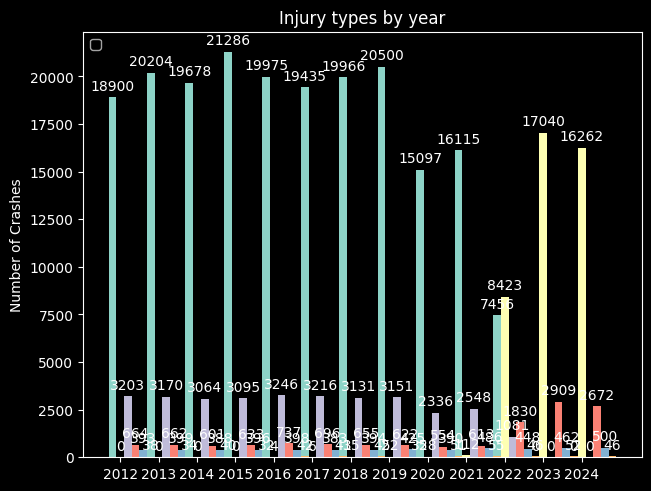

In [67]:
#Facilitate analysis of CrashSeverity + MaxInjurySeverity by replacing the NaNs with "None" as a string
summary_table_sorted_year['MaxInjurySeverity'] = summary_table_sorted_year['MaxInjurySeverity'].fillna("None")
summary_table_sorted_year['CrashSeverity'] = summary_table_sorted_year['CrashSeverity'].fillna("None")

print(summary_table_sorted_year['MaxInjurySeverity'].unique())
print(summary_table_sorted_year['CrashSeverity'].unique())

#helper functions - returns the count of each category in a year
def yearly_crashseverity_sums (frame, case, years):
    yearcount = []
    for year in years:
        yearcount.append(frame[(frame["CaseYear"]==year) & (frame["CrashSeverity"] == case)]['CrashSeverity'].count())

    return yearcount

def yearly_maxinjury_sums (frame, case, years):
    yearcount = []
    for year in years:
        yearcount.append(frame[(frame["CaseYear"]==year) & (frame["MaxInjurySeverity"] == case)]['MaxInjurySeverity'].count())

    return yearcount

#from here on out i was thinking a clustered bargraph to showcase the breakdown year on year but idk

#grouped barchart showing the total number of max injuries per year by category
# code sourced from https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
maxinjuries_totals = {
    'None': yearly_maxinjury_sums(summary_table_sorted_year, "None", years),
    'Unknown': yearly_maxinjury_sums(summary_table_sorted_year, "U - UNKNOWN", years),
    'Possible Injury': yearly_maxinjury_sums(summary_table_sorted_year, "C - POSSIBLE INJURY", years),
    'Injury': yearly_maxinjury_sums(summary_table_sorted_year, "B - INJURY", years),
    'Serious Injury': yearly_maxinjury_sums(summary_table_sorted_year, "A - SERIOUS INJURY", years),
    'Fatality':yearly_maxinjury_sums(summary_table_sorted_year, "K - FATAL", years),
}


x = np.arange(len(years))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

print(maxinjuries_totals.items())
for attribute, measurement in maxinjuries_totals.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Crashes')
ax.set_title('Injury types by year')
ax.set_xticks(x + width, years)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim()



dict_items([('None', [np.int64(2), np.int64(11), np.int64(3), np.int64(2), np.int64(7), np.int64(8), np.int64(4), np.int64(6), np.int64(3), np.int64(4), np.int64(4), np.int64(0), np.int64(0)]), ('Unknown', [np.int64(18833), np.int64(20152), np.int64(19638), np.int64(21277), np.int64(19973), np.int64(19435), np.int64(19973), np.int64(20503), np.int64(15109), np.int64(16215), np.int64(15711), np.int64(16802), np.int64(16059)]), ('Possible Injury', [np.int64(4326), np.int64(4272), np.int64(4090), np.int64(4132), np.int64(4380), np.int64(4296), np.int64(4185), np.int64(4212), np.int64(3299), np.int64(3655), np.int64(3524), np.int64(3611), np.int64(3376)]), ('Injury', [np.int64(37), np.int64(34), np.int64(40), np.int64(31), np.int64(42), np.int64(40), np.int64(44), np.int64(34), np.int64(45), np.int64(55), np.int64(45), np.int64(50), np.int64(45)])])


/tmp/ipykernel_21113/1486434469.py:27: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



(0.0, 22340.85)

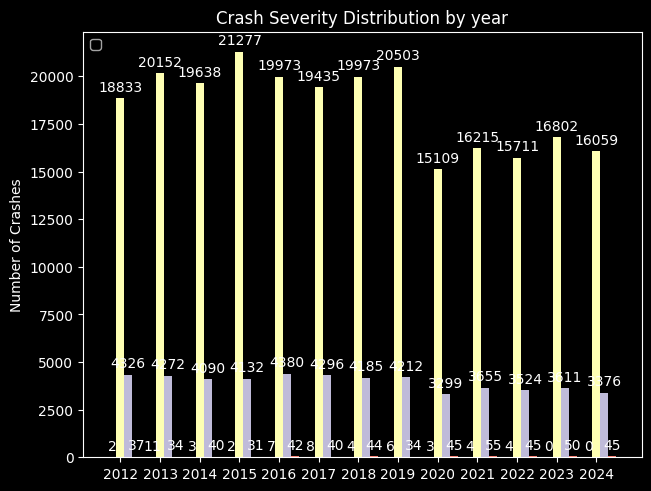

In [69]:
#grouped barchart showing the total number of crashes per year by crash severity

maxcrashsevs_totals = {
    'None': yearly_crashseverity_sums(summary_table_sorted_year, "None", years),
    'Unknown': yearly_crashseverity_sums(summary_table_sorted_year, "PROPERTY DAMAGE", years),
    'Possible Injury': yearly_crashseverity_sums(summary_table_sorted_year, "INJURY", years),
    'Injury': yearly_crashseverity_sums(summary_table_sorted_year, "FATAL", years),
}

x = np.arange(len(years))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

print(maxcrashsevs_totals.items())
for attribute, measurement in maxcrashsevs_totals.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Crashes')
ax.set_title('Crash Severity Distribution by year')
ax.set_xticks(x + width, years)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim()

